In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sanbul = pd.read_csv('C:\project22\python\sanbul_rank_group30.csv', encoding = 'euc-kr')

sanbul.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [3]:
sanbul_A = sanbul[(sanbul.group == 1)]

total_area = sanbul_A['피해면적_합계'].sum()
# 피해면적/total_area 비율 계산 100%로 계산
sanbul_A['radio_g'] = sanbul_A['피해면적_합계']/total_area * 100
# 피해면적 누계 계산 # 누계합 함수 cumsum
sanbul_A['cumulative_A'] = sanbul_A['radio_g'].cumsum()

C:\Users\user\AppData\Local\Temp\ipykernel_13724\3985006820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_A['radio_g'] = sanbul_A['피해면적_합계']/total_area * 100
C:\Users\user\AppData\Local\Temp\ipykernel_13724\3985006820.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_A['cumulative_A'] = sanbul_A['radio_g'].cumsum()


In [4]:
wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

wether_2 = pd.read_csv('C:\project22\python\OBS_AWS_DD_20220714142558.csv', encoding = 'euc-kr')
wether_2.drop(['지점'], axis=1, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_13724\1454446577.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe.csv', encoding = 'euc-kr')


In [5]:
index_name = ['stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'sumRn', 'maxInsWs', 'maxInsWsHrmt', 'avgWs', 'maxInsWsWd']

wether_2.columns = index_name

In [6]:
wether_concat = pd.concat([wether, wether_2])

In [7]:
# 산불발생 날, 장소와 날씨 합치기 위한 기준열 만들어주기
sanbul_A['day_place'] = sanbul_A['tm'] + sanbul_A['발생장소_시군구']
wether_concat['day_place'] = wether_concat['tm'] + wether_concat['stnNm']

# 데이터 합치기
sanbul_A_wether = pd.merge(wether_concat, sanbul_A, on = 'day_place')

C:\Users\user\AppData\Local\Temp\ipykernel_13724\1075689377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_A['day_place'] = sanbul_A['tm'] + sanbul_A['발생장소_시군구']


In [8]:
sanbul_A_wether.rename(columns = {'피해면적_합계' : 'damaged_area'}, inplace=True)

In [9]:
# sanbul_A_wether

In [10]:
sanbul_corr = sanbul_A_wether[['stnNm', 'tm_x','avgTa', 'minTa', 'maxTa', 'maxInsWs', 'maxInsWsWd', 
                              'maxWs', 'maxWsWd', 'hr24SumRws', 'avgTd', 'minRhm', 'avgRhm',
                              'avgPv', 'avgPa', 'sumSsHr', 'damaged_area']]

In [26]:
# 상관분석
sanbul_corr.corr()

,avgTa,minTa,maxTa,maxInsWs,maxInsWsWd,maxWs,maxWsWd,hr24SumRws,avgTd,minRhm,avgRhm,avgPv,avgPa,sumSsHr,damaged_area
avgTa,1.000000,0.932031,0.964186,0.051942,-0.424715,0.351861,-0.176817,0.243583,0.749139,-0.231355,-0.061729,0.690795,-0.213875,0.323779,0.120999
minTa,0.932031,1.000000,0.815504,0.219410,-0.309098,0.521310,-0.035598,0.486348,0.530738,-0.311799,-0.273399,0.511621,-0.004568,0.280158,0.192512
maxTa,0.964186,0.815504,1.000000,-0.079000,-0.487338,0.130677,-0.279669,-0.023143,0.844499,-0.168761,0.168554,0.751202,-0.369940,0.305185,0.053310
maxInsWs,0.051942,0.219410,-0.079000,1.000000,0.288963,0.974657,0.247640,0.821161,-0.246358,-0.391178,-0.754607,-0.291905,-0.018456,0.187216,0.500772
maxInsWsWd,-0.424715,-0.309098,-0.487338,0.288963,1.000000,0.215851,0.843987,0.097517,-0.475860,-0.106944,-0.311543,-0.477201,0.249217,-0.040153,0.147789
maxWs,0.351861,0.521310,0.130677,0.974657,0.215851,1.000000,0.197882,0.881904,-0.196056,-0.355082,-0.737728,-0.229634,0.018316,0.181173,0.529937
maxWsWd,-0.176817,-0.035598,-0.279669,0.247640,0.843987,0.197882,1.000000,0.066290,-0.333631,-0.193941,-0.341936,-0.350843,0.193846,-0.027716,0.013209
hr24SumRws,0.243583,0.486348,-0.023143,0.821161,0.097517,0.881904,0.066290,1.000000,-0.262539,-0.220599,-0.735430,-0.233594,0.192758,0.121493,0.541213
avgTd,0.749139,0.530738,0.844499,-0.246358,-0.475860,-0.196056,-0.333631,-0.262539,1.000000,0.246731,0.598716,0.952900,-0.259862,0.211223,-0.086086
minRhm,-0.231355,-0.311799,-0.168761,-0.391178,-0.106944,-0.355082,-0.193941,-0.220599,0.246731,1.000000,0.609501,0.301273,0.324951,0.005179,-0.088230


<AxesSubplot:>

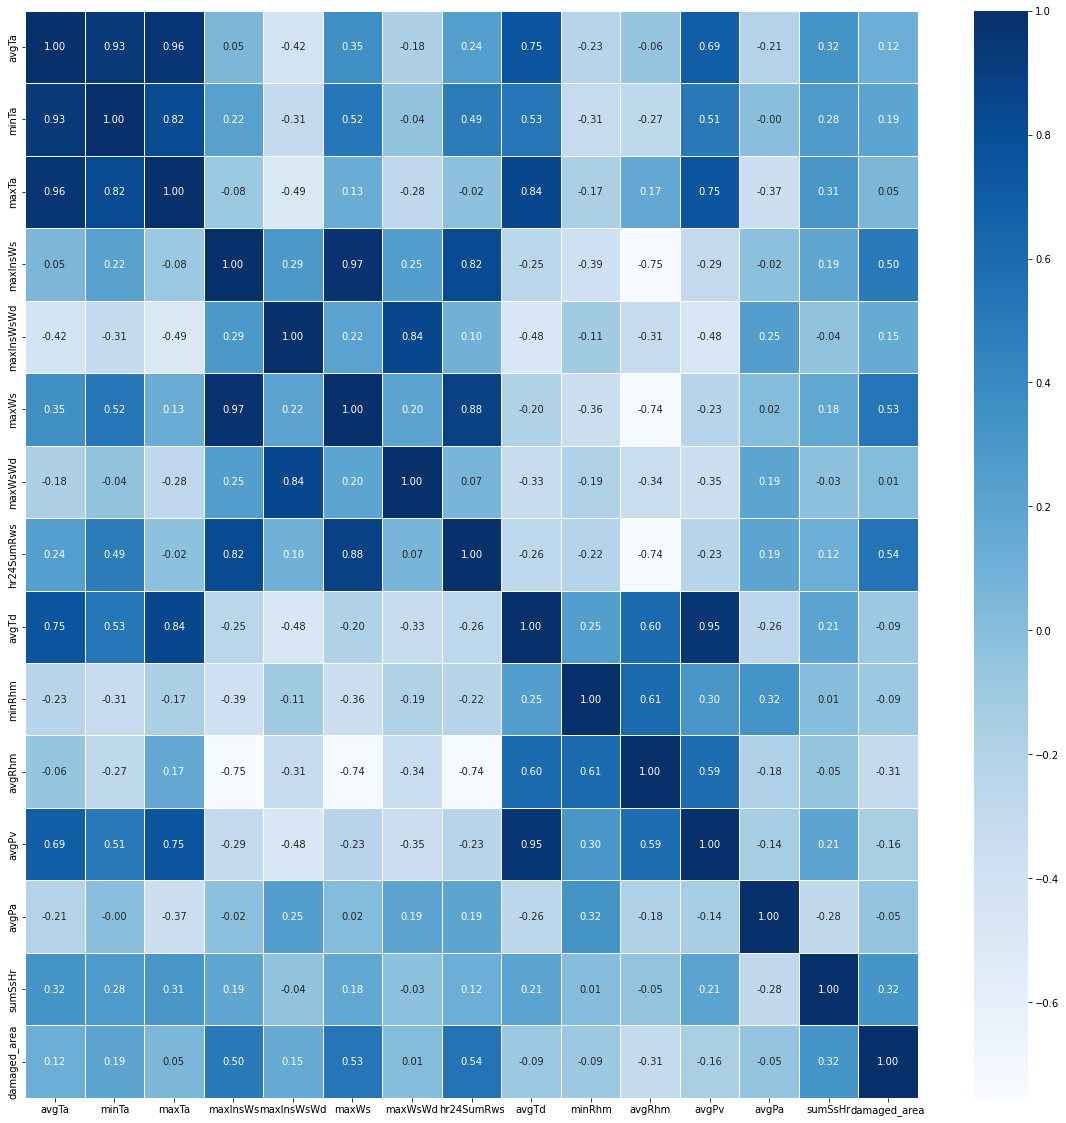

In [27]:
# 히트맵 그려보기
plt.figure(figsize=(20, 20))
sns.heatmap(data = sanbul_corr.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')